<a href="https://colab.research.google.com/github/ToAN7/SIC_AI/blob/TrongKha_/SIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#install thư viện

In [1]:
!pip install sentence_transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [2]:
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3542 sha256=7ffd10536e29ac72d4b6957e54f9b2cd7c761bcc850b0f0a6b2e915a5ff88f08
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [3]:
!pip install spicy

In [4]:
!pip install spatial

  Preparing metadata (setup.py) ... done
  Created wheel for spatial: filename=spatial-0.2.0-py3-none-any.whl size=8484 sha256=56f9f47f39dc0f8a30a01aaf08e29a7eee09e856f004e1fbc48c815cc1e2ffed
  Stored in directory: /root/.cache/pip/wheels/b3/a9/45/5776d9357e179ab80f60dfbf7d002d095f1a7c5d8f86104bd3
Successfully built spatial


#import các thư viện

In [5]:
from sklearn.svm import SVR# mô hình chạy thử
import pandas as pd# lấy dữ liệu
import numpy as np # tính toán
import matplotlib.pyplot as plt # vẽ đồ thị
from sentence_transformers import SentenceTransformer # Doc2Vec với dữ liệu dùng để kiểm thử
from sklearn.cluster import KMeans # Clustering
from sklearn.model_selection import train_test_split # Chia dữ liệu
from sklearn.model_selection import cross_val_score, KFold # đánh giá mô hình
from sklearn.metrics import accuracy_score # đánh giá mô hình
import re # tiền xử lý
import string # tiền xử lý
from sklearn.decomposition import PCA # giảm chiều dữ liệu
from scipy.spatial.distance import pdist, squareform # Tìm tâm cụm
from sklearn.metrics.pairwise import euclidean_distances #tính khoảng cách đầu vào và so sánh với tâm cụm
from sklearn.svm import OneClassSVM # Phân loại
from sklearn.feature_extraction.text import TfidfVectorizer # Tính tfidf


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [6]:
# model = SentenceTransformer('keepitreal/vietnamese-sbert')

In [7]:
vietnamese_stop_words = [
              'là', 'và', 'có', 'trên', 'cho', 'một', 'các', 'được', 'như', 'với',
              'của', 'ở', 'khi', 'đã', 'còn', 'thì', 'này', 'bởi', 'đó', 'để', 'năm',
              'ngày', 'vào', 'sau', 'tại', 'trong', 'rằng', 'đến', 'từ'
              ]

In [8]:
# model.save('/content/drive/MyDrive/SIC/model_doc2vec')

In [30]:
model = SentenceTransformer('/content/drive/MyDrive/SIC/model_doc2vec')

#Hàm

In [31]:
#Hàm dùng của Kmeans
def isFake(text):
  propress_text = convertData(text)
  ebd_text = model.encode(propress_text)
  ebd_text = pca.transform(ebd_text.reshape(1,-1))
    #Ta có toạ độ text mới, và toạ độ tâm centroid
  tammoi = np.array([centroid[0][0],centroid[1][1]])
  tammoi = tammoi.reshape(1,-1)

  toadox = ebd_text[0][0]-centroid[0][0]
  toadoy = ebd_text[0][1]-centroid[1][1]
  canhhuyen = np.sqrt(toadox**2 + toadoy**2)

  return canhhuyen

In [32]:
#Hàm tính độ đo cosine
def cosine_similarity(x_vec,y_vec):
  cosine_similarities = []
  for i in range(x_vec.shape[0]):
    cos_sim = (x_vec[i] * y_vec.T).toarray().squeeze()
    cosine_similarities.append(cos_sim)
  return cosine_similarities

In [33]:
#Hàm làm sạch dữ liệu <nên dùng trước khi vector hoá dữ liệu>
def convertData(text):
  text = text.lower()
  text = re.sub('\[.*?\]','',text)
  text = re.sub("\\W"," ",text)
  text = re.sub('https?://\S+|www\.\S+','',text)
  text = re.sub('<.*?>+',b'',text)
  text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
  text = re.sub('\w*\d\w*','',text)
  text = re.sub(' +', ' ',text)
  text = text.strip()
  text = ' '.join([word for word in text.split() if word not in vietnamese_stop_words])
  return text

In [34]:
#~ KHông dùng được do không đủ RAM để chạy hàm
# #hàm dùng với embeddings
# def cosine_similarity_1(x_vec, y_vec):
#   cosine_similarities = []
#   for i in range(len(x_vec)):
#     cos_sim = (x_vec[i] * y_vec.to_numpy()).squeeze()#.toarray()
#     cosine_similarities.append(cos_sim)
#   return cosine_similarities

#Lấy dữ liệu ra từ drive

In [35]:
#data: Dữ liệu đã được embeddings có shape (8943,768)
data = pd.read_csv('/content/drive/MyDrive/SIC/Embeddings_DATA.csv')
#đọc file thật và giả
real_news = pd.read_csv('/content/drive/MyDrive/Data_/Data_test_300/DATA_.csv')
fake_news = pd.read_csv('/content/drive/MyDrive/Data_/Data_test_300/Fake_news_all.csv')

In [36]:
data.drop(columns=['Unnamed: 0'],inplace=True)
real_news.drop(columns=['Unnamed: 0'],inplace=True)
# fake_news.drop(columns=['Unnamed: 0'],inplace=True)

#Tiếp cận 1 xác định độ tương đồng
1. tin giả ~ 304 dòng
2. tin thật ~ 8943 dòng

In [42]:
#chuyển nội dung thành danh sách
X_real = real_news['Content'].tolist()
X_fake = fake_news['Content'].tolist()
#Tiền xử lý dữ liệu
X_Fake = [convertData(news) for news in X_fake]
X_Real = [convertData(news) for news in X_real]

In [43]:
#Trích xuất tfidf vector
vectorizer = TfidfVectorizer()
#Gộp 2 tập dữ liệu để tạo vecto cùng chiều
News = X_Fake + X_Real
#Tạo vectơ
News_vector = vectorizer.fit_transform(News)

In [44]:
News_vector.shape

(9247, 33358)

In [45]:
#Chia lại vecto cho từng tập sau khi đã tạo
fake_vectors = News_vector[:len(X_Fake)]
real_vectors = News_vector[len(X_Fake):]

In [46]:
cosine_similarities = cosine_similarity(fake_vectors[:],real_vectors[:])
#Độ đo cosine của tin giả đầu tiên
print(f'Độ đo cosine của tin giả đầu tiên{cosine_similarities[0]}')

Độ đo cosine của tin giả đầu tiên[0.08337389 0.08354359 0.         ... 0.         0.         0.05725778]


In [47]:
#=>Mỗi giá trị của mảng là 1 độ đo cosin của tin giả đó ứng với 1 tin trong tập tin thật
#Tìm ra phần tử có độ đo cosin lớn nhất ở mỗi tin giả => Độ chính xác của tin
ketqua = list()
for i in range (len(cosine_similarities)):
  print(cosine_similarities[i].max())
  ketqua.append(cosine_similarities[i].max())

0.5643615484128375
0.38237215891900866
0.42152242546280705
0.41027705188001046
0.6262306983050778
0.3285363111835272
0.27893542773455493
0.3927097631876174
0.36519019275275727
0.3657067747828149
0.34503277102665614
0.33365629564493715
0.271317139523756
0.4423543093047033
0.4054443102650501
0.39925550985396174
0.35678801192167275
0.3779396348705058
0.5435435844851997
0.3495384136169266
0.31491737754952204
0.33526451946927033
0.31655502333509516
0.25837360237339196
0.4686937317072828
0.5813855780831212
0.4292931377608883
0.4744473161361525
0.6037394555114319
0.3395928575888511
0.5648812340252936
0.3806790501600141
0.32168332712919795
0.367227663594312
0.4866612764276954
0.25913548599827546
0.4676275584597875
0.2516087222113357
0.2705448342257158
0.5748716826496986
0.32266821989582084
0.26469428818388396
0.750296214983279
0.2997167734760445
0.559909425316391
0.5119864107041153
0.4993434487455705
0.4469640157089761
0.36172574460960266
0.43132118248882656
0.24221631416720263
0.3239187867886

In [48]:
list_fake = list()

In [49]:
#Độ tương đồng < 50 là ở mức có khả năng là tin giả và ngược lại
num = 0
for idx,kq in enumerate(ketqua):
  if kq < 0.5:
    list_fake.append(idx)
print(len(list_fake)/len(fake_news)) # số lượng tin có khả năng là giả / số lượng tin giả

0.680921052631579


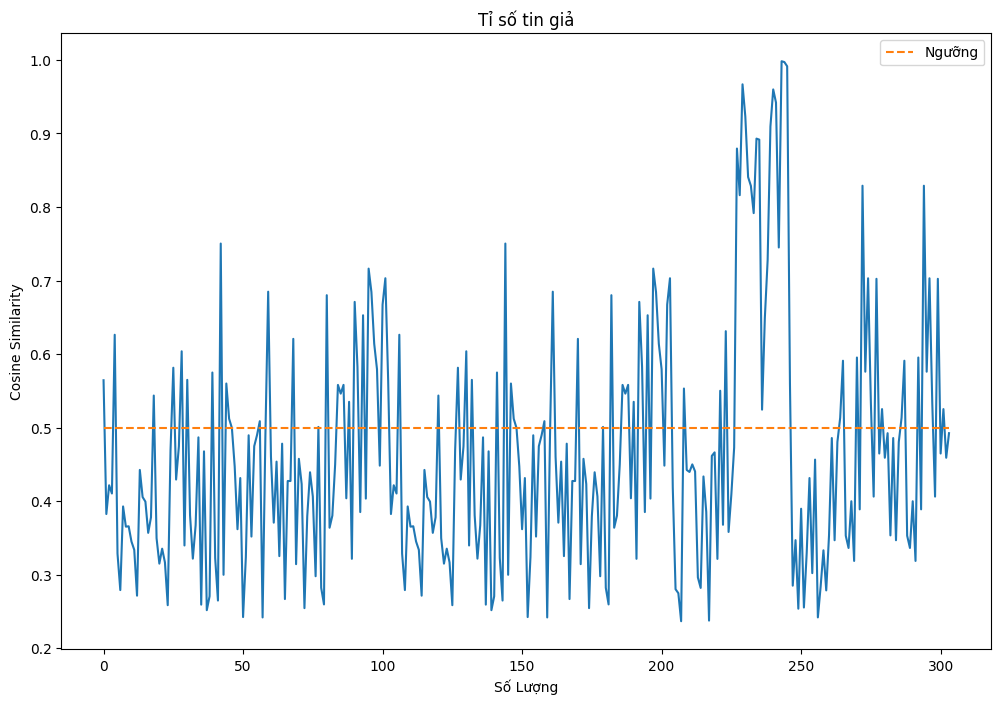

In [50]:
#Trực quan hoá kết quả
plt.figure(figsize=(12, 8))
plt.plot(ketqua)
plt.plot([0.5] * len(ketqua), '--', label='Ngưỡng')
plt.xlabel('Số Lượng')
plt.ylabel('Cosine Similarity')
plt.title('Tỉ số tin giả')
plt.legend()
plt.show()

#Tiếp cận 2: Kmeans

In [51]:
# #Giảm chiều dữ liệu để trực quan hoá dữ liệu cho thoải mái hơn
pca = PCA(n_components=2)
data = pca.fit_transform(data)

In [52]:
model_Kmeans = KMeans(n_clusters=4, random_state=42)

In [53]:
model_Kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [54]:
def caculate_thresholds(model, data, cluster_numb):
  ans = []
  if cluster_numb > model.n_clusters | cluster_numb == None:
    return None
  for i in range(model_Kmeans.n_clusters):
    cluster_ = data[model_Kmeans.labels_ == i]
    distance = model_Kmeans.transform(cluster_)
    min_distance = distance.min(axis=1)
    max_distance = distance.max(axis=1)
    threshold = max_distance.sum()/len(max_distance) - min_distance.sum()/(len(min_distance))
    ans.append(threshold)
  return ans


In [55]:
centroids = model_Kmeans.cluster_centers_

In [56]:
# với 4 cụm ta tìm x giữa 2 cụm xa nhau theo trục x và 2 cụm theo trục y
cs1 = centroids[0]
cs2 = centroids[1]
cs3 = centroids[2]
cs4 = centroids[3]
centroid_x = (cs1 + cs2)/2
centroid_y = (cs3 + cs4)/2
centroid = np.array([centroid_x,centroid_y])

In [57]:
print(cs1)
print(cs2)
print(cs3)
print(cs4)

[-1.2627712   0.06028229]
[ 0.04042593 -0.64403101]
[ 1.60508145 -0.12483894]
[0.28198025 1.55334103]


In [58]:
# centroid# tâm cụm có x là [0,0], y là [1,1]

In [59]:
list_test = list()

In [60]:
for i in range(model_Kmeans.n_clusters):
  ths = caculate_thresholds(model_Kmeans, data, model_Kmeans.n_clusters)

In [61]:
ths[0]

2.1930598934720047

In [66]:
text = input()
list_test.append(text)# nhằm lưu lại các text đã dùng
propress_text = convertData(text)
ebd_text = model.encode(propress_text)
ebd_text = pca.transform(ebd_text.reshape(1,-1))
  #Ta có toạ độ text mới, và toạ độ tâm centroid
# tammoi = np.array([centroid[0][0],centroid[1][1]])
# tammoi = tammoi.reshape(1,-1)
  #tính khoảng cách giữa 2 tâm
# dst_y =np.sqrt((tammoi[0][0]-ebd_text[0][0])**2 + (tammoi[0][1]-ebd_text[0][1])**2)
# tm = np.array([0,dst_y+centroid[1][1]]).reshape(1,-1)
# dst_x = np.sqrt((0-ebd_text[0][0])**2 + (dst_y-ebd_text[0][1])**2)
toadox = ebd_text[0][0]-centroid[0][0]
toadoy = ebd_text[0][1]-centroid[1][1]
print(f'2 cạnh góc vuông theo trục x, y {toadox,toadoy}')
canhhuyen = np.sqrt(toadox**2 + toadoy**2)
if (canhhuyen) > ths[0]:
  print('Có khả năng là tin không có thật')
else:
  print('Có khả năng là tin thật')
print(f'Toạ độ của văn bản: {ebd_text[0][0]}:{ebd_text[0][1]}')
print(f'Khoảng cách tìm được so với tâm: {centroids[1][1]+canhhuyen}')
print(ths[0] < (centroids[1][1]+canhhuyen))


trường đại học Mở phá sản
2 cạnh góc vuông theo trục x, y (0.5934025483566953, 1.6169010488052815)
Có khả năng là tin thật
Toạ độ của văn bản: -0.01777008655718627:2.331152094472185
Khoảng cách tìm được so với tâm: 1.078320745970314
False


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [63]:
ths[0]

2.1930598934720047

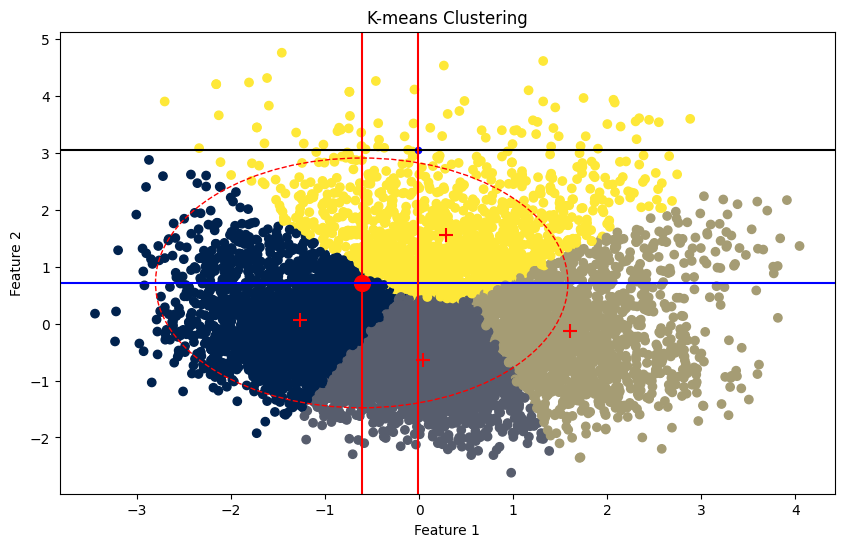

In [67]:
plt.figure(figsize=(10, 6))

plt.scatter(data[:,0], data[:, 1], c=model_Kmeans.labels_, cmap='cividis')
plt.scatter(centroids[:,0],centroids[:,1],marker='+',color='red',s=100)# s là kích thước của tất cả các điểm centroids, đặt 100 để chúng trở nên nổi bật hơn
plt.scatter(centroid[0][0],centroid[1][1],marker='o',color='red',s=130)
plt.scatter(ebd_text[0][0],ebd_text[0][1]+centroid[1][1],marker='o',color='blue',s=20)
#
#tìm ra ngưỡng thích hợp làm ngưỡng chung
circle = plt.Circle((centroid [0][0],centroid[1][1]), radius=ths[0], color='red', fill=False, linestyle='--')
plt.gca().add_patch(circle)

# circle = plt.Circle((centroids[1,0], centroids[1,1]), radius=ths[1], color='blue', fill=False, linestyle='--')
# plt.gca().add_patch(circle)
# circle = plt.Circle((centroids[2,0], centroids[2,1]), radius=ths[2], color='brown', fill=False, linestyle='--')
# plt.gca().add_patch(circle)
# circle = plt.Circle((centroids[3,0], centroids[3,1]), radius=ths[3], color='gray', fill=False, linestyle='--')
# plt.gca().add_patch(circle)

##Vẽ đồ thị để hình dung cách tính khoảng cách

plt.axvline(x=centroid[0][0], color='r', linestyle='-')
plt.axhline(y=centroid[1][1],color='blue')

plt.axhline(y=ebd_text[0][1]+centroid[1][1],color='black')
plt.axvline(x=ebd_text[0][0], color='r', linestyle='-')

# plt.axvline(x=0, color='gray', linestyle='--')
# plt.axhline(y=0, color='gray', linestyle='--')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

#Tiếp cận 3: SVM.SVR

In [ ]:
model_svmSvr = SVR(kernel='rbf', C=100, epsilon=0.1)

In [ ]:
real_news.drop(columns=['Date','Source'],inplace=True)

In [ ]:
numb = 0
dulieu_gia = list()
for id in range(len(fake_news)):
  if id == list_fake[numb]:
    dulieu_gia.append(fake_news['Content'][id])
    numb += 1

In [ ]:
dulieu_gia = pd.DataFrame(dulieu_gia)

In [ ]:
dulieu_gia.columns = ['Content']
# real_news = real_news['Content'][:414]

In [ ]:
# real_news.columns

Index(['Content'], dtype='object')

In [ ]:
dulieu = pd.concat([dulieu_gia,real_news],ignore_index=True)

In [ ]:
dulieu.drop(columns=['Date','Source'],inplace=True)

In [ ]:
dudoan_f = np.ones(len(dulieu_gia))

In [ ]:
dudoan_t = np.zeros(len(real_news))

In [ ]:
pred = np.concatenate((dudoan_f,dudoan_t),axis=0)# nhãn với 1 là tin giả, 0 là tin thật

In [ ]:
dulieu.tail()

,Content
9145,"Thời tiết TP.HCM hôm nay 29/7,mây gián đoạn, t..."
9146,"Để phát triển kinh tế, Bình Định cho khai thác..."
9147,Phụ huynh và thí sinh có thể tham khảo điểm ch...
9148,"Câu chuyện ""tam giác tình yêu"" kỳ lạ ở Nhật Bả..."
9149,Bạn thân của chồng tôi muốn sinh con cho người...


In [ ]:
# dulieu_ = model.encode(dulieu['Content'])

In [ ]:
dulieu_ = vectorizer.fit_transform(dulieu['Content'])

In [ ]:
dulieu_.shape

(9150, 36512)

In [ ]:
print(dulieu_.shape)

(9150, 36512)


In [ ]:
model_svmSvr.fit(dulieu_,pred)

SVR(C=100)

In [ ]:
vectorizer.fit(dulieu['Content'])

In [ ]:
# text = "Thủ tướng thúc tiến độ loạt dự án trọng điểm vùng Đông Nam bộ"
text = "Philippines cáo buộc không quân Trung Quốc quấy rối máy bay trên bãi cạn Scarborough"
text = convertData(text)
tfIdf_text = vectorizer.transform([text])#dưới 0.5 là chính xác
# ebd_text = model.encode([text])
print(model_svmSvr.predict(tfIdf_text))

[0.11558559]


# Xác định tỉ số
!!! format tên file: mục đích _ số lượng tin real _ số lượng tin fake . csv
1. dùng tập test 300 <số lượng bài real và fake ngẫu nhiên>
2. vẽ đồ thị cột của mỗi cách

In [68]:
# 5 tập test
data_test0 = pd.read_csv("/content/drive/MyDrive/Data_/Data_test_300/data_test_151_149.csv")
data_test1 = pd.read_csv("/content/drive/MyDrive/Data_/Data_test_300/data_test_193_107.csv")
data_test2 = pd.read_csv("/content/drive/MyDrive/Data_/Data_test_300/data_test_233_67.csv")
data_test3 = pd.read_csv("/content/drive/MyDrive/Data_/Data_test_300/data_test_85_215.csv")
data_test4 = pd.read_csv("/content/drive/MyDrive/Data_/Data_test_300/data_test_9_291.csv")

In [69]:
data_test0.drop(columns=['Unnamed: 0'],inplace=True)
data_test1.drop(columns=['Unnamed: 0'],inplace=True)
data_test2.drop(columns=['Unnamed: 0'],inplace=True)
data_test3.drop(columns=['Unnamed: 0'],inplace=True)
data_test4.drop(columns=['Unnamed: 0'],inplace=True)

In [75]:
data_test0[120:155]

,Content
120,ngày thông tin từ ubnd h vân đồn cho biết hiện...
121,"Ông Nguyễn Bảo Quốc, phó giám đốc Sở Giáo dục ..."
122,"Mở cao điểm kiểm tra, CSGT Bình Định, Khánh Hò..."
123,từ hôm nay thí sinh bắt đầu đăng ký nguyện vọn...
124,"Bí hội thứ chín (Thành Nguyễn dịch, NXB Kim Đồ..."
125,bà chỉ dám len lén nhìn vội canh kịp cái rùng ...
126,Công an huyện Hoài Đức đã nhiều lần triệu tập ...
127,Nổi tiếng là ‘hoa hậu thân thiện' nhưng Thái T...
128,mở đầu số thứ podcast đối thoại trương nguyện ...
129,một ngày sau khi vô địch tour de france cua rơ...


In [70]:
data_test = [data_test0,data_test1,data_test2,data_test3,data_test4]

In [71]:
# data_test.drop(columns=['Unnamed: 0'],inplace=True)
len_real0 = 151
len_real1 = 193
len_real2 = 233
len_real3 = 85
len_real4 = 9

In [72]:
len_real = [len_real0,len_real1,len_real2,len_real3,len_real4]

In [73]:
vectorizer = TfidfVectorizer(max_features=3500)
real_vectors = vectorizer.fit_transform(real_news['Content'])

In [74]:
kiemtra = list()
ans = list()
for i in range(5):
  text = [convertData(data_test[i]['Content'][j]) for j in range(len(data_test[i]))]
  d_test = vectorizer.transform(text)

  print(d_test.shape)
  cosine_similarities = cosine_similarity(d_test,real_vectors)

  for j in range (len(cosine_similarities)):
    # print(cosine_similarities[j].max())
    kiemtra.append(cosine_similarities[j].max())
  # print(len_real[i])
  kiemtra_real = kiemtra[:len_real[i]]
  # print(len(kiemtra_real))
  danhgia_real_ = sum(1 for x in kiemtra_real if x > 0.5)
  print(f'Tỉ số tin thật của data_test{i} : {danhgia_real_ /len_real[i]}')
  ans.append(danhgia_real_/len_real[i])
  # print(danhgia_real_)
  kiemtra.clear()

(300, 3500)
Tỉ số tin thật của data_test0 : 1.0
Tỉ số tin giả của data_test0 : 0.0
(300, 3500)
Tỉ số tin thật của data_test1 : 1.0
Tỉ số tin giả của data_test1 : 0.0
(300, 3500)
Tỉ số tin thật của data_test2 : 1.0
Tỉ số tin giả của data_test2 : 0.0
(300, 3500)
Tỉ số tin thật của data_test3 : 1.0
Tỉ số tin giả của data_test3 : 0.0
(300, 3500)
Tỉ số tin thật của data_test4 : 1.0
Tỉ số tin giả của data_test4 : 0.0


#Kmeans

In [ ]:
ans_kmeans = list()

In [ ]:
for i in len_real:
  print(i)

151
193
233
85
9


In [ ]:
ths[0]

1.6874427434330375

In [ ]:
for i in range(5):
  kiemtra = [isFake(data_test[i]['Content'][j]) for j in range(len(data_test[i]))]
  danhgia_real_Kmeans = sum(1 for x in kiemtra if x < ths[0])
  print(f'Tỉ số tin thật của data_test{i} : {danhgia_real_Kmeans /len_real[i]}')
  ans_kmeans.append(danhgia_real_Kmeans/len_real[i])
  danhgia_real_Kmeans = 0

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr

Tỉ số tin thật của data_test0 : 1.0198675496688743


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/usr

KeyboardInterrupt: 

In [ ]:
print(ans_kmeans)

[1.0198675496688743, 0.9792746113989638, 0.8326180257510729, 1.576470588235294, 10.88888888888889]


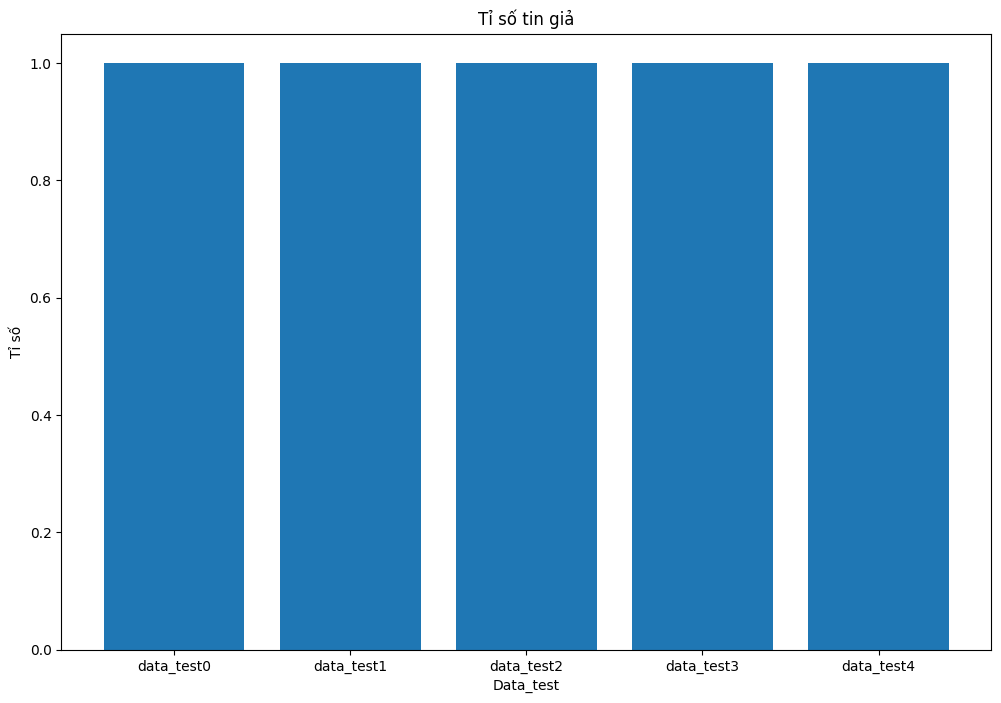

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(['data_test0','data_test1','data_test2','data_test3','data_test4'],ans)
plt.xlabel('Data_test')
plt.ylabel('Tỉ số')
plt.title('Tỉ số tin giả')
plt.show()

<h1> Việc dùng doc2vec để xác định độ tương đồng không nổi do thiếu hụt RAM </h1>